In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import TransferFunction, lti, dlti, bilinear, step, dstep

# Leitura dos dados

In [ ]:
data = loadmat("/content/drive/MyDrive/sinais/assets/GrupoRobo_10.mat")
z1 = data['z1']
l = len(z1)
y = z1[:, 0]
u = z1[:, 1]

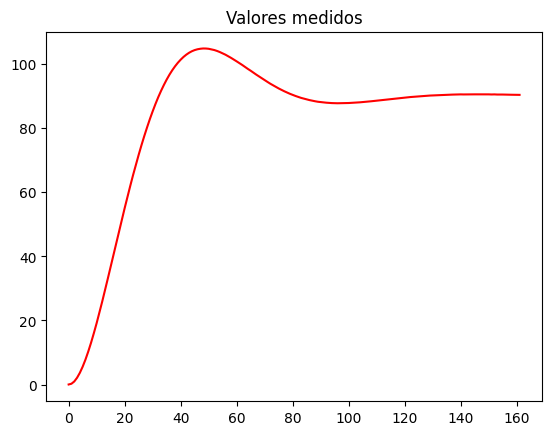

In [ ]:
plt.plot(y, 'r')
plt.title("Valores medidos")
plt.show()

# Atividade 1

## Modelo de 1ª ordem

In [ ]:
def sim_1st(u, theta):
  # Inicialização do vetor de saída estimado
  y_est1 = np.zeros_like(u)

  # Condição inicial
  y_est1[0] = 0  # Supondo condição inicial zero

  # Simulação do modelo de primeira ordem
  for k in range(1, len(u)):
    y_est1[k] = theta[0] * y_est1[k-1] + theta[1] * u[k-1]

  return y_est1

In [ ]:
def sim_2nd(u, theta):
  # Inicialização do vetor de saída estimado
  y_est2 = np.zeros_like(u)

  # Condições iniciais
  y_est2[0] = 0  # Supondo condição inicial y(k=0) = 0
  y_est2[1] = 0  # Supondo condição inicial y(k=1) = 0

  # Simulação do modelo de segunda ordem
  for k in range(2, len(u)):
    y_est2[k] = theta[0] * y_est2[k-1] + theta[1] * y_est2[k-2] + theta[2] * u[k-1] + theta[3] * u[k-2]

  return y_est2

In [ ]:
def tf_z_2nd(theta):
  # Coeficientes do numerador e do denominador
  num = [0, theta[3], theta[2]]
  den = [1, -theta[0], -theta[1]]

  # Criar objeto de transferência discreta
  Gz2 = TransferFunction(num, den, dt=1)

  return Gz2

In [ ]:
# Modelo Discreto
X1 = np.column_stack((y[:-1], u[:-1]))

# Obtenção dos parâmetros a1, b1
theta1 = np.linalg.pinv(X1.T @ X1) @ X1.T @ y[1:]

# Simulando resposta para o modelo de 1ª ordem
y1_est = sim_1st(u, theta1)

# Erro de estimação
erro1 = y - y1_est

# MSE
Jest1 = np.linalg.norm(erro1)**2 / len(y)

# Exibindo os resultados
print("Os parâmetros estimados foram:")
print(theta1)
print("-"*60)
print("A equação à diferenças é:")
print(f"y(k) = {theta1[0]:.4f} y(k-1) + {theta1[1]:.4f} u(k-1)\n")
print("-"*60)
print(f"A aproximação J é: {Jest1}\n")
print("-"*60)
print("A função em Z é:")
print(f"Y(z) = {theta1[0]:.4f} Y(z) z^-1 + {theta1[1]:.4f} U(z) z^-1\n")
print("-"*60)
print("A função de transferência em z, G(z) é:")
print(f"Y(z)/U(z) = ({theta1[1]:.4f} z^-1 )/(1 - {abs(theta1[0]):.4f} z^-1)\n")

Os parâmetros estimados foram:
[0.96579923 0.03757044]
------------------------------------------------------------
A equação à diferenças é:
y(k) = 0.9658 y(k-1) + 0.0376 u(k-1)

------------------------------------------------------------
A aproximação J é: 157.4488851456444

------------------------------------------------------------
A função em Z é:
Y(z) = 0.9658 Y(z) z^-1 + 0.0376 U(z) z^-1

------------------------------------------------------------
A função de transferência em z, G(z) é:
Y(z)/U(z) = (0.0376 z^-1 )/(1 - 0.9658 z^-1)



In [ ]:
def y_k(y0, n):
  y = np.zeros(n)
  y[0] = y0
  for i in range(1,n):
    y[i] = 0.9658 * y[i-1] + 0.0376

  return y

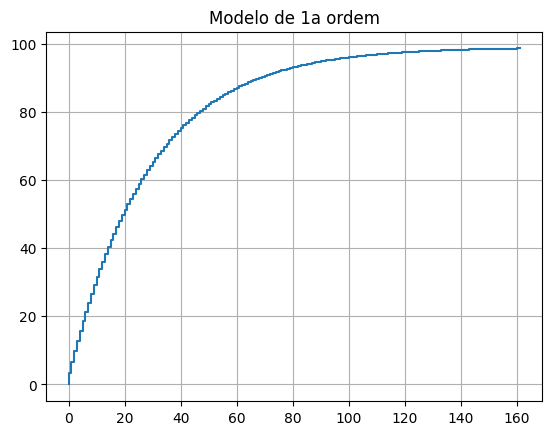

In [ ]:
y_1st_order = 90 * y_k(0, l)
plt.step(range(l), y_1st_order)
plt.title("Modelo de 1a ordem")
plt.grid()
plt.show()

## Modelo de 2ª ordem

In [ ]:
# Modelo Discreto
X = np.column_stack((y[1:-1], y[:-2], u[1:-1], u[:-2]))

# Obtenção dos parâmetros a1, a0, b1, b0
theta2 = np.linalg.pinv(X.T @ X) @ X.T @ y[2:]

# Simulando resposta para o modelo de 2ª ordem
y2_est = sim_2nd(u, theta2)

# Erro de estimação
erro2 = y - y2_est

# MSE
Jest2 = np.linalg.norm(erro2)**2 / l

# Função de transferência no domínio Z para 2ª ordem
Gz2 = tf_z_2nd(theta2)

# Função de transferência no domínio S para 2ª ordem
num_ct, den_ct = bilinear(Gz2.num, Gz2.den, 1.0)
Gs2 = TransferFunction(num_ct, den_ct)

# Exibindo os resultados
print("Os parâmetros estimados foram:")
print(theta2)
print("------------------------------------------------------------------")
print("A equação a diferenças é:")
print(f"y(k) = {theta2[0]:.4f} y(k-1) + {theta2[1]:.4f} y(k-2) + "
      f"{theta2[2]:.4f} u(k-1) + {theta2[3]:.4f} u(k-2)\n")
print("------------------------------------------------------------------")
print(f"A aproximação Jest é: {Jest2}\n")
print("------------------------------------------------------------------")
print("A função em Z é:")
print(f"Y(z) = {theta2[0]:.4f} Y(z) z^-1 + {theta2[1]:.4f} Y(z) z^-2 +"
      f"{theta2[2]:.4f} U(z) z^-1 + {theta2[3]:.4f} U(z) z^-2\n")
print("------------------------------------------------------------------")
print("A função de transferência em z, G(z) é:")
print(f"Y(z)/U(z) = ({theta2[2]:.4f} z^-1 + {theta2[3]:.4f} z^-2)/"
      f"(1 - {theta2[0]:.4f} z^-1 + {abs(theta2[1]):.4f} z^-2)")

Os parâmetros estimados foram:
[ 1.92168467 -0.92713437  0.00273196  0.00273196]
------------------------------------------------------------------
A equação a diferenças é:
y(k) = 1.9217 y(k-1) + -0.9271 y(k-2) + 0.0027 u(k-1) + 0.0027 u(k-2)

------------------------------------------------------------------
A aproximação Jest é: 0.42915818556627366

------------------------------------------------------------------
A função em Z é:
Y(z) = 1.9217 Y(z) z^-1 + -0.9271 Y(z) z^-2 +0.0027 U(z) z^-1 + 0.0027 U(z) z^-2

------------------------------------------------------------------
A função de transferência em z, G(z) é:
Y(z)/U(z) = (0.0027 z^-1 + 0.0027 z^-2)/(1 - 1.9217 z^-1 + 0.9271 z^-2)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


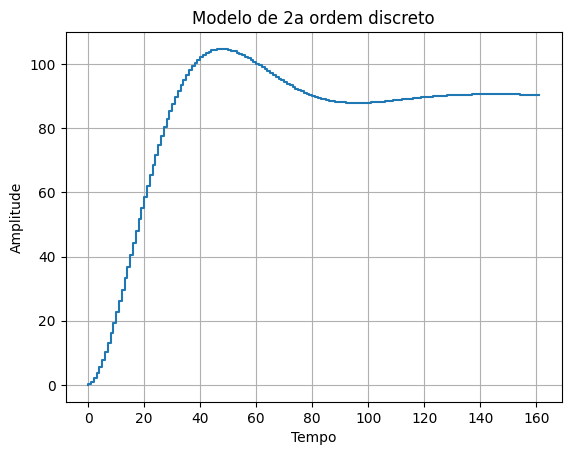

In [ ]:
discrete_tf = dlti(Gz2.num, Gz2.den)  # Create discrete-time transfer function
time_discrete, response_discrete = dstep(discrete_tf, n=l)
plt.figure(2)
plt.step(time_discrete, 90*response_discrete[0])
plt.title("Modelo de 2a ordem discreto")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## Comparação entre os modelos

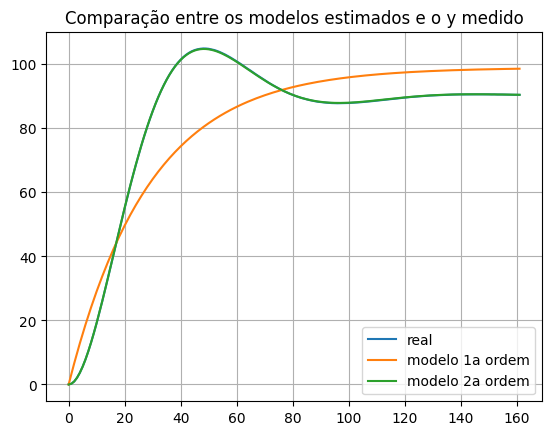

In [ ]:
plt.plot(y, label='real')
plt.plot(y_1st_order, label='modelo 1a ordem')
plt.plot(time_discrete, 90*response_discrete[0], label='modelo 2a ordem')
plt.title("Comparação entre os modelos estimados e o y medido")
plt.legend()
plt.grid()
plt.show()

# Atividade 2

In [ ]:
def tustin_num(coefficients, Ts):
    return [Ts**2 * (coefficients[0] + coefficients[2]),
            4 * Ts * (coefficients[0] - coefficients[2]),
            4 * (coefficients[0] + coefficients[2])]

def tustin_den(coefficients, Ts):
    return [Ts**2 * (coefficients[0] - coefficients[1]),
            4 * Ts * coefficients[0],
            4 * (coefficients[0] + coefficients[1])]

In [ ]:
# Given coefficients
numerator = [-0.03175, 0, 0.03175]
denominator = [1.3016, -1.238, 0]

# Sampling times
Ts = 0.01
Ts1 = 0.1
Ts2 = 1.0

# Creating discrete-time transfer function Gz
Gz = TransferFunction(numerator, denominator, dt=Ts)

# Creating continuous-time transfer functions G1_s and G2_s using the Tustin method
num_G1_s = tustin_num(numerator, Ts1)
den_G1_s = tustin_den(denominator, Ts1)
G1_s = TransferFunction(num_G1_s, den_G1_s)

num_G2_s = tustin_num(numerator, Ts2)
den_G2_s = tustin_den(denominator, Ts2)
G2_s = TransferFunction(num_G2_s, den_G2_s)

# Printing transfer functions
print("Discrete-time transfer function Gz:")
print(Gz)
print("\nContinuous-time transfer function G1_s:")
print(G1_s)
print("\nContinuous-time transfer function G2_s:")
print(G2_s)

Discrete-time transfer function Gz:
TransferFunctionDiscrete(
array([-0.02439305,  0.        ,  0.02439305]),
array([ 1.        , -0.95113706,  0.        ]),
dt: 0.01
)

Continuous-time transfer function G1_s:
TransferFunctionContinuous(
array([-1.00015751,  0.        ]),
array([ 1.        , 20.50086628, 10.01732556]),
dt: None
)

Continuous-time transfer function G2_s:
TransferFunctionContinuous(
array([-0.10001575,  0.        ]),
array([1.        , 2.05008663, 0.10017326]),
dt: None
)


In [ ]:
time, response_Gz = dstep(Gz)
time_G1_s, response_G1_s = step(G1_s)
time_G2_s, response_G2_s = step(G2_s)

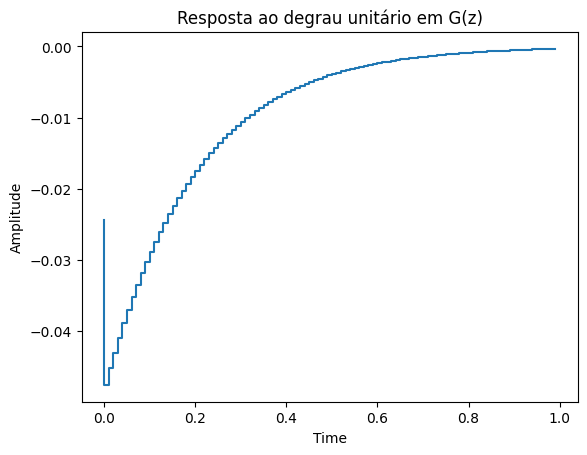

In [ ]:
plt.step(time, response_Gz[0])
plt.title("Resposta ao degrau unitário em G(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

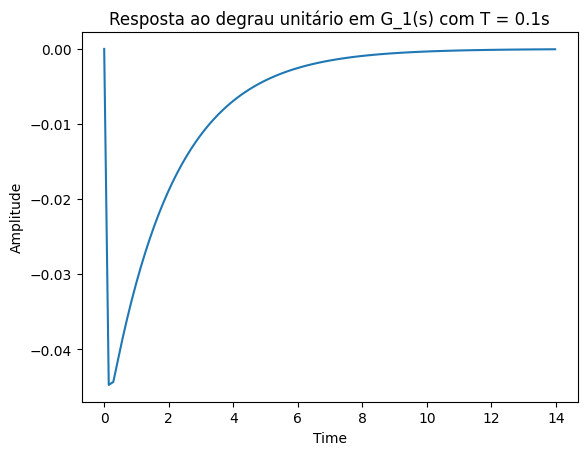

In [ ]:
plt.plot(time_G1_s, response_G1_s)
plt.title("Resposta ao degrau unitário em G_1(s) com T = 0.1s")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

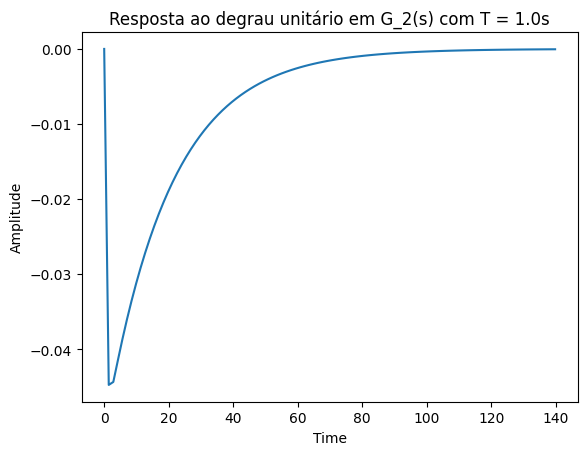

In [ ]:
plt.plot(time_G2_s, response_G2_s)
plt.title("Resposta ao degrau unitário em G_2(s) com T = 1.0s")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()